In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)

#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/tdidf_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/tdidf_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_validation_labels = pickle.load(data)
    
    
#Sequence Vector Features    
#Training Features
training_features_path = "./Pickles/sv_training_features.pickle"
with open(training_features_path, 'rb') as data:
    sv_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/sv_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    sv_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/sv_test_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/sv_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/sv_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/sv_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_validation_labels = pickle.load(data)

In [3]:
print(tdidf_training_features.shape)
print(tdidf_test_features.shape)

(5760, 1000)
(720, 1000)


In [4]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [5]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [6]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(tdidf_training_features, tdidf_training_labels)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 45.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [7]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.7963541666666667


In [8]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(tdidf_training_features, tdidf_training_labels)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 35.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [5, 10, 15], 'n_estimators': [800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [9]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.7934420480448886


In [10]:
best_rfc = grid_search.best_estimator_

In [11]:
best_rfc

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [13]:
best_rfc.fit(tdidf_training_features, tdidf_training_labels)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [14]:
rfc_pred = best_rfc.predict(tdidf_test_features)

In [16]:

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(tdidf_training_labels, best_rfc.predict(tdidf_training_features)))

The training accuracy is: 
0.9765625


In [17]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(tdidf_test_labels, rfc_pred))

The test accuracy is: 
0.8041666666666667


In [18]:

# Classification report
print("Classification report")
print(classification_report(tdidf_test_labels,rfc_pred))

Classification report
              precision    recall  f1-score   support

           1       0.82      0.80      0.81       130
           2       0.92      0.97      0.94       130
           3       0.78      0.88      0.82       113
           4       0.81      0.73      0.77       113
           5       0.72      0.69      0.70       110
           6       0.75      0.74      0.75       124

   micro avg       0.80      0.80      0.80       720
   macro avg       0.80      0.80      0.80       720
weighted avg       0.80      0.80      0.80       720



In [19]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

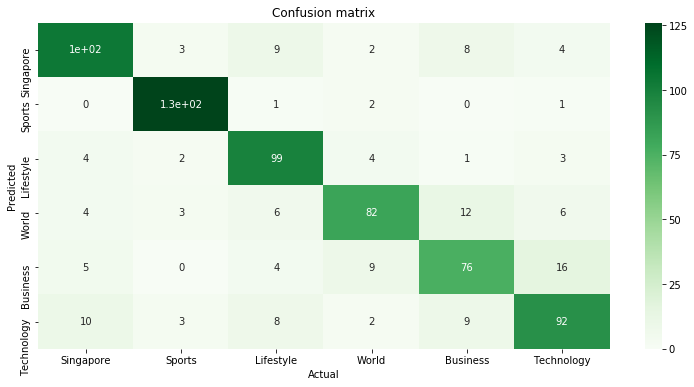

In [21]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(tdidf_test_labels, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [24]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, base_model.predict(tdidf_test_features))

/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7444444444444445

In [25]:
best_rfc.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, best_rfc.predict(tdidf_test_features))

0.8041666666666667

In [26]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(tdidf_training_labels, best_rfc.predict(tdidf_training_features)),
     'Test Set Accuracy': accuracy_score(tdidf_test_labels, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [27]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.976562,0.804167


In [29]:
with open('Models/randomForest_best_model.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('Models/randomForest_best_model_details.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)